In [0]:
%tensorflow_version 2.x

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

%matplotlib inline

Data standardization

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)

train_images_std = train_images.reshape((60000, 28, 28, 1))
train_images_std = train_images_std.astype('float32') / 255

test_images_std = test_images.reshape((10000, 28, 28, 1))
test_images_std = test_images_std.astype('float32') / 255

train_labels_std = to_categorical(train_labels)
test_labels_std = to_categorical(test_labels)

(60000, 28, 28)


Model definition

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 10, 10, 32)        18464     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1024)            

In [0]:
model.fit(train_images_std, train_labels_std, epochs = 5, validation_split=0.2)
model.evaluate(test_images_std, test_labels_std)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4628 - accuracy: 0.8299 - val_loss: 0.3029 - val_accuracy: 0.8911
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2890 - accuracy: 0.8943 - val_loss: 0.2886 - val_accuracy: 0.8958
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2422 - accuracy: 0.9115 - val_loss: 0.2385 - val_accuracy: 0.9139
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2083 - accuracy: 0.9241 - val_loss: 0.2414 - val_accuracy: 0.9122
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2560 - accuracy: 0.9098


[0.25601643323898315, 0.9097999930381775]

conv2d_15 2
max_pooling2d_8 2
conv2d_16 4
max_pooling2d_9 4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


conv2d_17 4


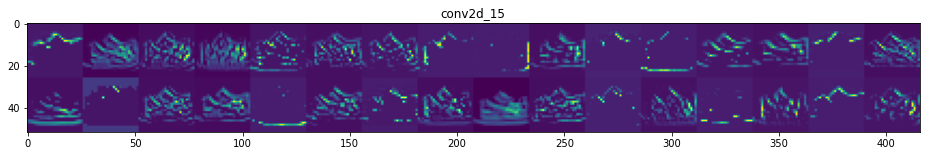

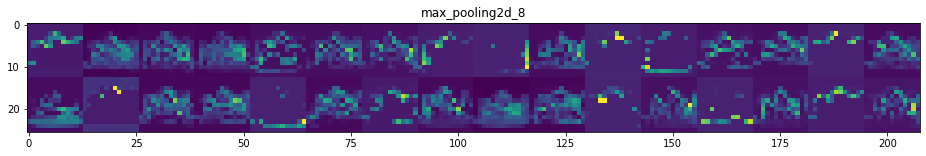

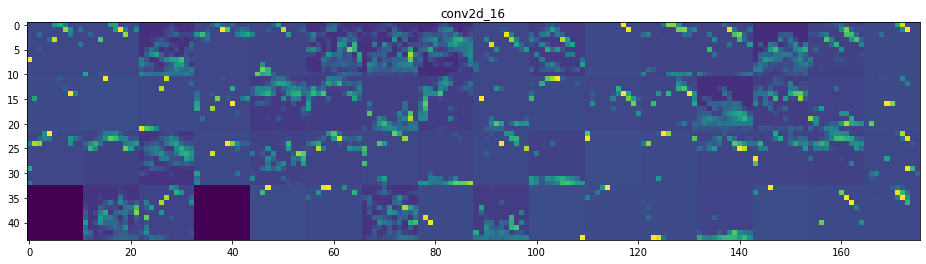

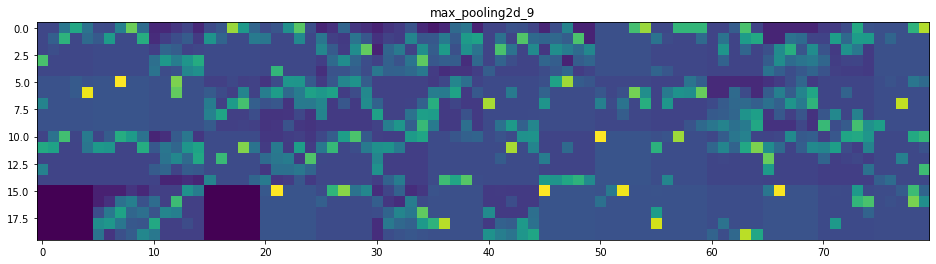

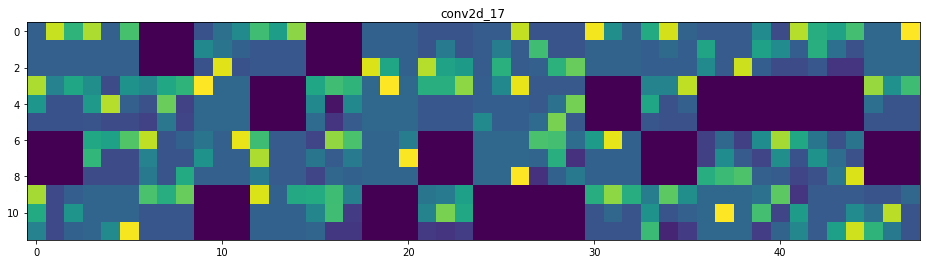

In [0]:
images_per_row = 16

fashion_layer_outputs = [layer.output for layer in model.layers[:5]]
fashion_activation_model = models.Model(inputs=model.input, outputs=fashion_layer_outputs)

fashion_test_image = test_images[-1]
fashion_test_tensor = np.expand_dims(fashion_test_image, axis=0)

fashion_activations = fashion_activation_model.predict(fashion_test_tensor)
fashion_layer_names = [layer.name for layer in model.layers[:5]]

for layer_name, layer_activation in zip(fashion_layer_names, fashion_activations):
  n_features = layer_activation.shape[-1]
  
  size = layer_activation.shape[1]
  
  n_cols = n_features // images_per_row
  
  print(layer_name, n_cols)
  
  display_grid = np.zeros((size*n_cols, images_per_row * size))
  
  for col in range(n_cols): 
    for row in range(images_per_row): 
      channel_image = layer_activation[0, :, :, col * images_per_row + row] 
      # Post-process the feature to make it visually palatable 
      channel_image -= channel_image.mean() 
      channel_image /= channel_image.std() 
      channel_image *= 32 
      channel_image += 64 
      channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
      
  # Display the grid 
  scale = 1. / size 
  plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0])) 
  plt.title(layer_name) 
  plt.grid(False) 
  plt.imshow(display_grid, aspect='auto', cmap='viridis')